In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [12]:
df.shape

(847, 2)

In [16]:
print(f"Data range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Data range of gold prices available from - 1950-01 to 2020-07


In [17]:
date = pd.date_range (start = '1/1/1950', end='8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [21]:
df['month']= date
df.drop('Date', axis =1,inplace= True)
df = df.set_index ('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


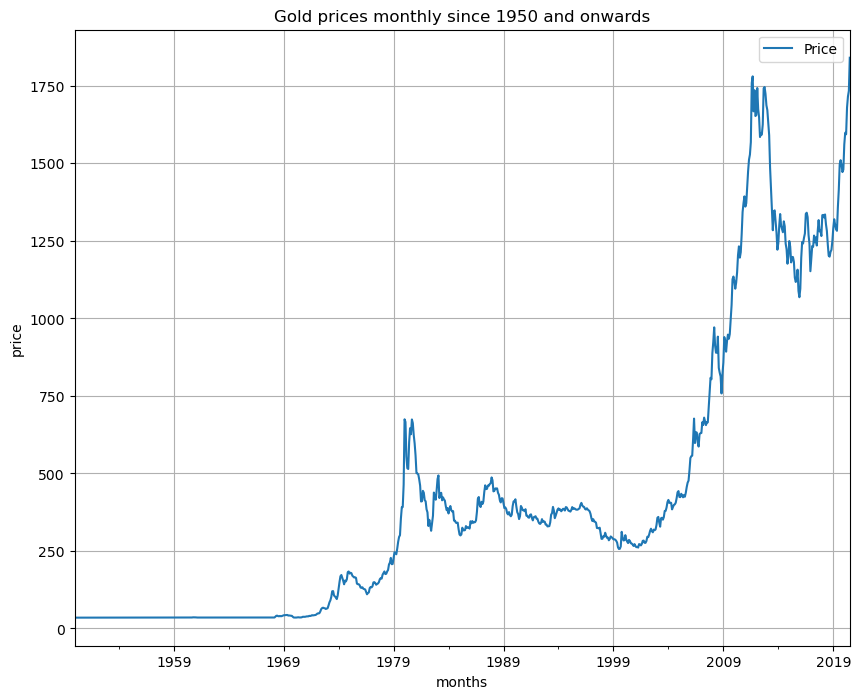

In [25]:
df.plot(figsize=(10,8))
plt.title("Gold prices monthly since 1950 and onwards")
plt.xlabel("months")
plt.ylabel('price')
plt.grid();

In [26]:
round (df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


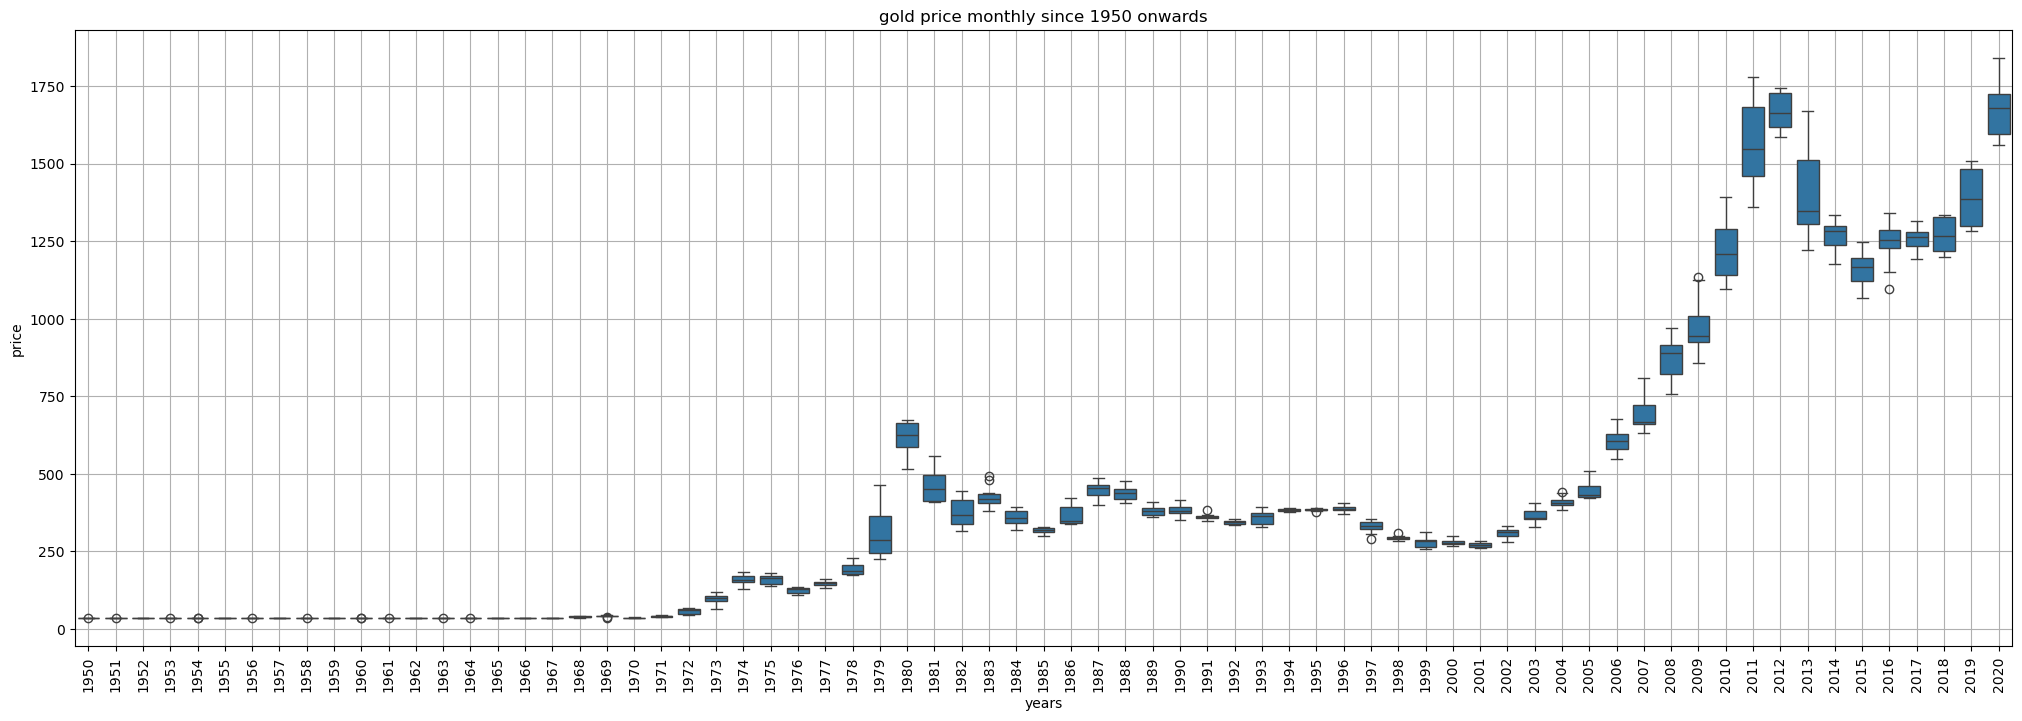

In [32]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y = df.values[:,0], ax=ax)
plt.title ('gold price monthly since 1950 onwards')
plt.xlabel('years')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid();

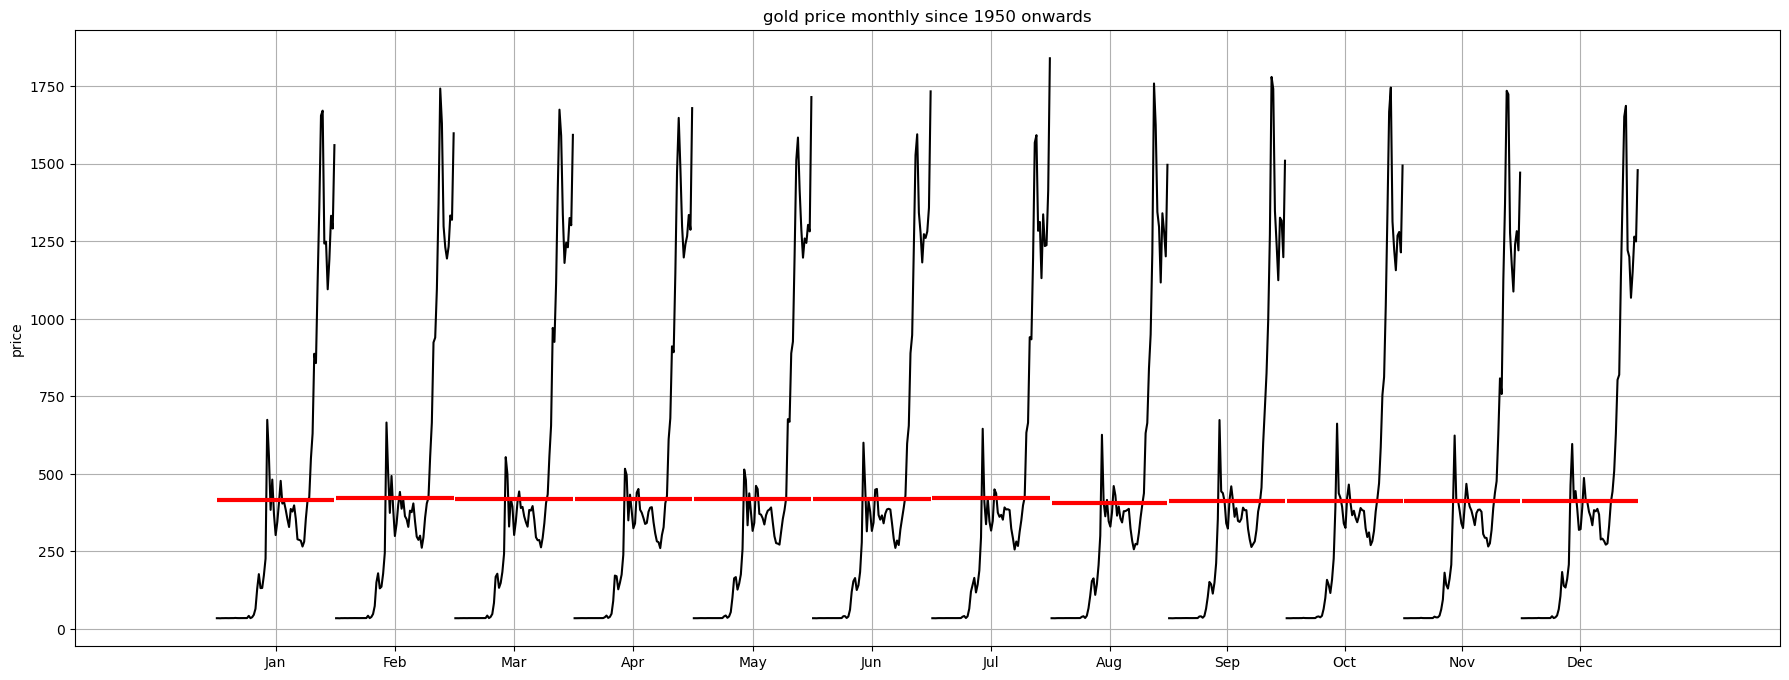

In [37]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot (df,ylabel = 'gold price',ax = ax)
plt.title ('gold price monthly since 1950 onwards')
plt.ylabel ('month')
plt.ylabel ('price')
plt.grid();

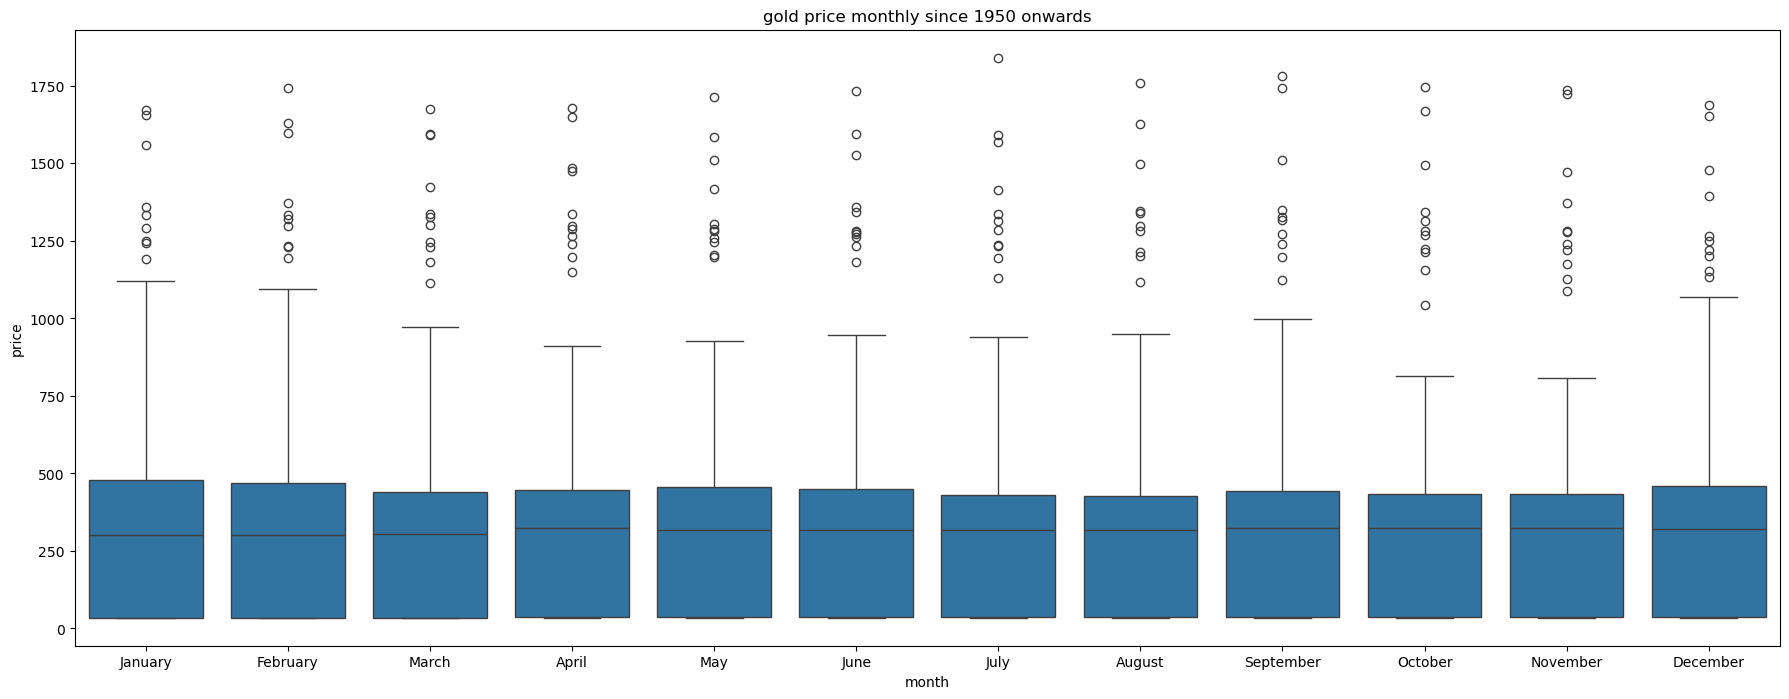

In [38]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y= df.values[:,0],ax=ax)
plt.title ('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.show();

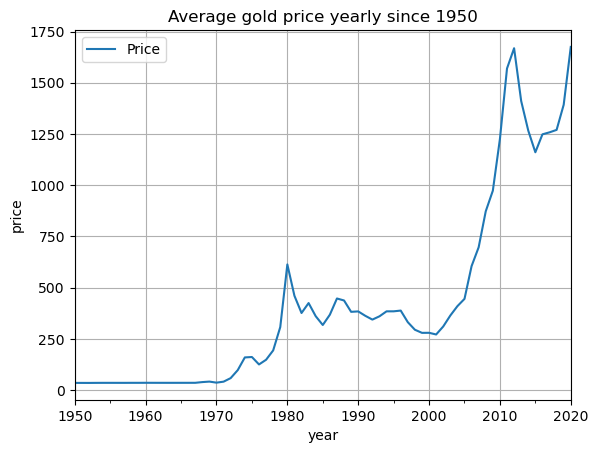

In [40]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title ("Average gold price yearly since 1950")
plt.xlabel('year')
plt.ylabel('price')
plt.grid()


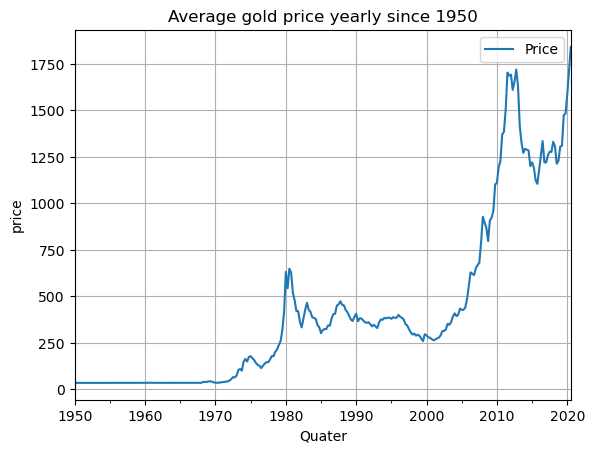

In [42]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title ("Average gold price yearly since 1950")
plt.xlabel('Quater')
plt.ylabel('price')
plt.grid()

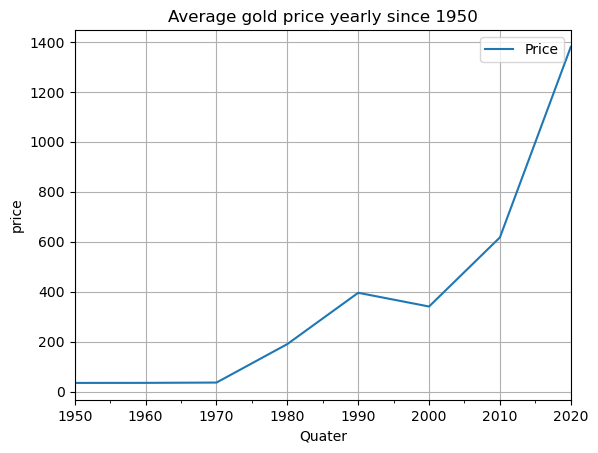

In [43]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title ("Average gold price yearly since 1950")
plt.xlabel('Quater')
plt.ylabel('price')
plt.grid()

In [48]:
df_1 = df.groupby(df.index.year).mean().rename(columns = {'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns ={'Price': 'Std'}), left_index= True, right_index=True)
df_1['cov_pct']= ((df_1['Std']/df_1["Mean"])*100).round(2)
df_1.head()


,Mean,Std,cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


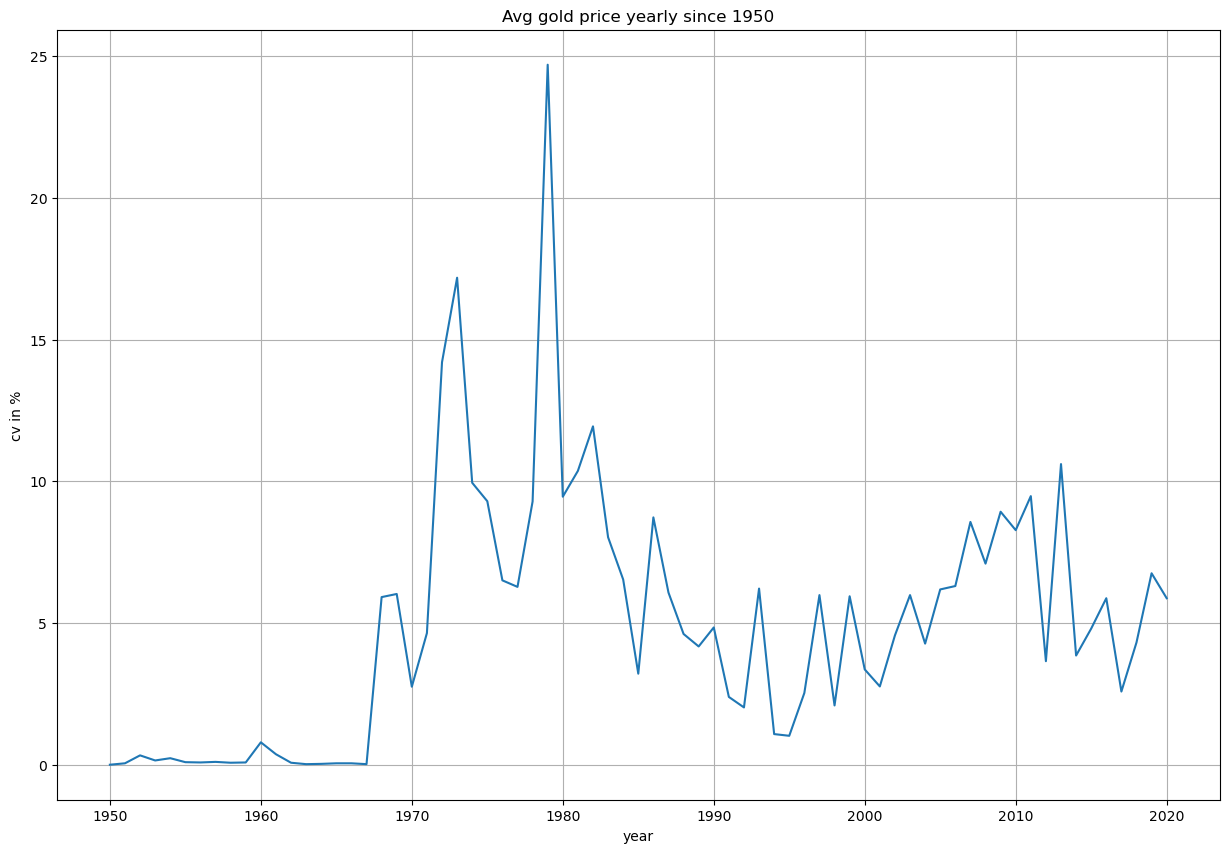

In [58]:
fig, ax = plt.subplots(figsize= (15,10))
df_1['cov_pct'].plot();
plt.title("Avg gold price yearly since 1950")
plt.xlabel('year')
plt.ylabel('cv in %')
plt.grid()


In [60]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [61]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


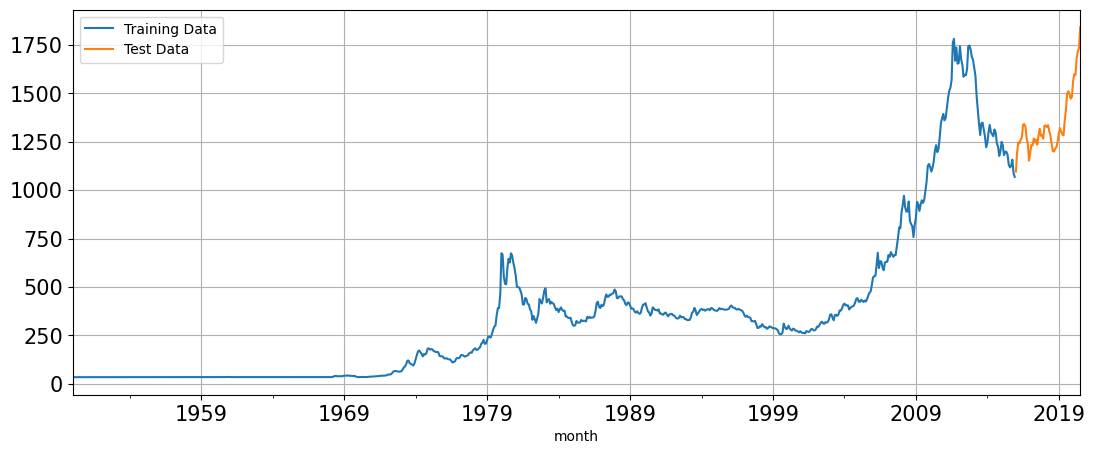

In [62]:
train["Price"].plot(figsize=(13,5), fontsize = 15)
test["Price"].plot(figsize=(13,5), fontsize = 15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [63]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [64]:
LR_train = train.copy()
LR_test = test.copy()


In [65]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [66]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train["Price"].values)

LinearRegression()

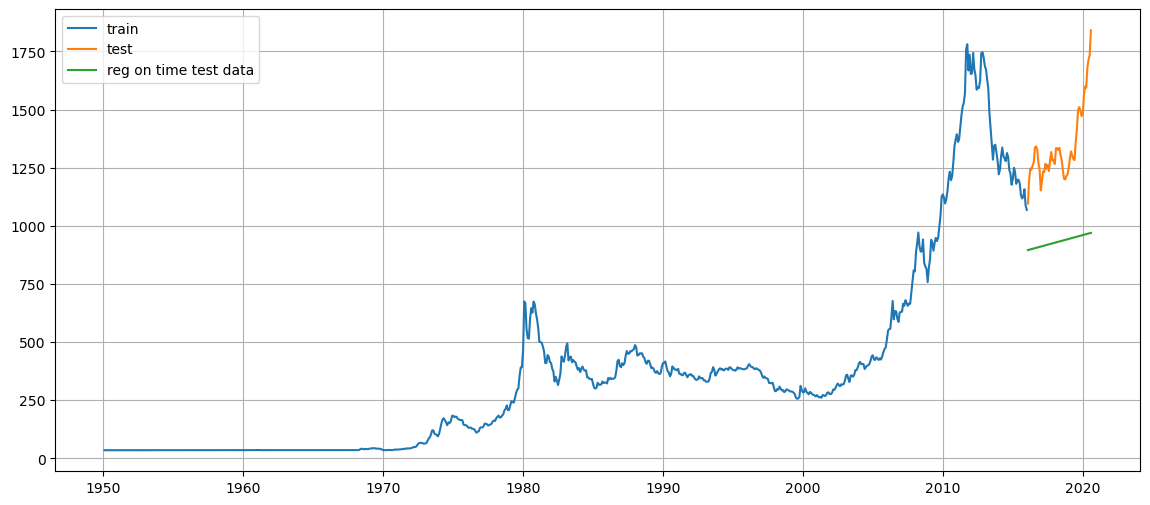

In [69]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize = (14, 6))
plt.plot(train['Price'], label = 'train')
plt.plot(test["Price"], label = 'test')
plt.plot(LR_test['forecast'], label = 'reg on time test data')
plt.legend(loc = 'best')
plt.grid()

In [70]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/ actual))*100, 2)

In [76]:
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print("MAPE is %.3f"%(mape_model1_test),"%")


MAPE is 29.760 %


In [72]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index=["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,29.76


In [73]:
final_model = ExponentialSmoothing(df,
                                  trend = 'additive',
                                  seasonal = 'additive').fit(smoothing_level = 0.4,
                                                            smoothing_trend = 0.3,
                                                            smoothing_seasonal = 0.6)

In [74]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [75]:
predictions = final_model.forecast(steps=len(test))


In [77]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96 * np.std(final_model.resid, ddof=1),
                        'prediction': predictions,
                        'upper_CI': predictions + 1.96 * np.std(final_model.resid, ddof=1)})

pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


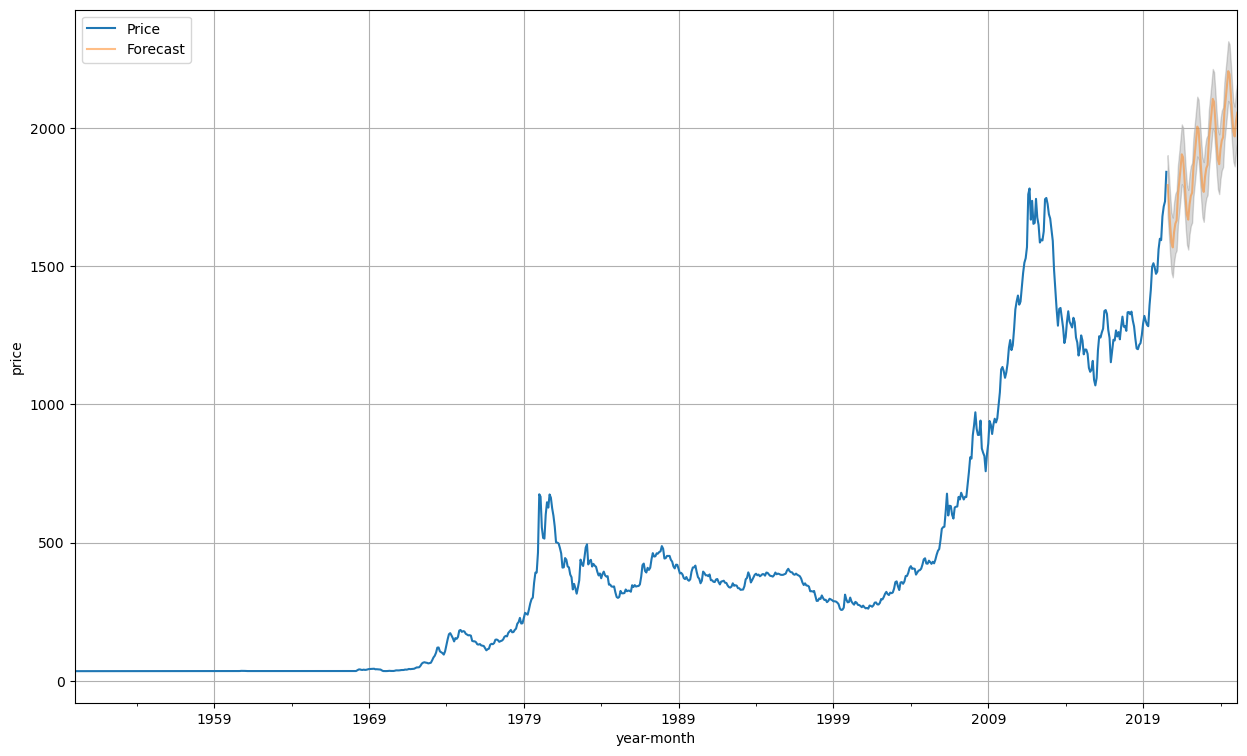

In [78]:
axis = df.plot(label = 'Actual', figsize=(15,9))
pred_df['prediction'].plot(ax = axis, label = 'Forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'k', alpha = 0.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.grid()
plt.show()